In [86]:
"""
    MNIST
    DataLoaer, Transformation
    Multilayer Neural Net, activation function
    loss and optimizer
    training loop(batch training)
    model evaluation
    GPU SUPPORT
"""

'\n    MNIST\n    DataLoaer, Transformation\n    Multilayer Neural Net, activation function\n    loss and optimizer\n    training loop(batch training)\n    model evaluation\n    GPU SUPPORT\n'

In [87]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


In [88]:
import pandas as pd

In [89]:
if torch.cuda.is_available():
    print("hello")
else:
    print("world")

world


In [90]:
# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [91]:
# hyper parameters
input_size = 784#28*28
hidden_size =100
num_classes =10# number is from 0 to 9
num_epochs = 2
batch_size=100
learning_rate = 0.001

In [92]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])

In [93]:
# mnist
train_dataset = torchvision.datasets.MNIST(root = './',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root = './',train=False,transform=transforms.ToTensor())

In [94]:
print(train_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()


In [95]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [96]:
examples = iter(train_loader)
samples,labels = examples.next()
print(samples.shape,labels.shape)
# batch size is 100, 1- because we have single colour channel

torch.Size([100, 1, 28, 28]) torch.Size([100])


In [97]:
print(samples)
print(labels)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

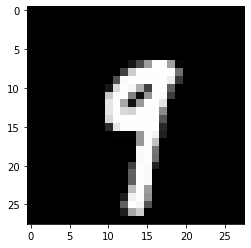

In [98]:
plt.imshow(samples[9][0],cmap = "gray")
plt.show()

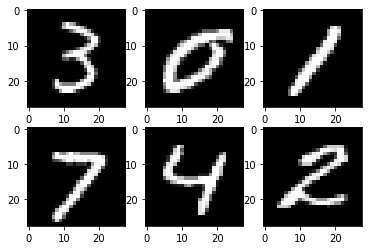

In [99]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap='gray')
plt.show()

In [100]:
# now we need to make our classifier model
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.tanh = nn.Tanh()
        self.l2 = nn.Linear(hidden_size,hidden_size//2)
        self.l3=nn.Linear(hidden_size//2,num_classes)

    def forward(self,x):
        out=self.l1(x)
        out=self.tanh(out)
        out=self.l2(out)
        out=self.tanh(out)
        out=self.l3(out)
        return out

In [101]:
model = NeuralNet(input_size,hidden_size,num_classes)

In [102]:
# loss and optimizer
criterion = nn.CrossEntropyLoss() # this will create the softmax for us 
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [103]:
# training loop 
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        # we need to reshape our images
        # 100,1,28,28 to  100,784
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backward pass
        optimizer.zero_grad()
        loss.backward
        optimizer.step()

        if (i+1) %100==0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

epoch 1 / 2, step 100/600, loss = 2.2952
epoch 1 / 2, step 200/600, loss = 2.3201
epoch 1 / 2, step 300/600, loss = 2.2977
epoch 1 / 2, step 400/600, loss = 2.2992
epoch 1 / 2, step 500/600, loss = 2.2760
epoch 1 / 2, step 600/600, loss = 2.2941
epoch 2 / 2, step 100/600, loss = 2.3031
epoch 2 / 2, step 200/600, loss = 2.2973
epoch 2 / 2, step 300/600, loss = 2.2913
epoch 2 / 2, step 400/600, loss = 2.2864
epoch 2 / 2, step 500/600, loss = 2.2888
epoch 2 / 2, step 600/600, loss = 2.3085


In [104]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100 * n_correct/n_samples  # calculate accuracy
    print(f'accuracy: {acc}')


accuracy: 11.84
